In [85]:
%load_ext autoreload
%autoreload 2
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

from UsingBezierFunctions import *#A,SY,B,R,N,Exp,ExpX,MinimisationExp,Y,X,Bsol,Nsol,BY,NY,Nsol,Ysol,S,res,rosen

Optimization terminated successfully.
         Current function value: 0.000046
         Iterations: 283
         Function evaluations: 507
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


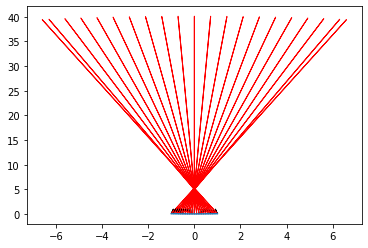

In [87]:
#ax = plt.axes(autoscale_on=False,xlim= {-2,  2},ylim= {0,  8000})
idx=nb-1
ax = plt.axes()#autoscale_on=False,xlim= {X[idx]-width,  X[idx]+width},ylim= {Ysol[idx]-0.1,  Ysol[idx]+1})

ax.plot(X,Ysol)
norm=sqrt(max(X)**2+max(Ysol)**2)

for i in range(len(X)):
    ax.arrow(X[i], Ysol[i], float(Nsol[i]&R.x)/float(0.01+sqrt(int(Nsol[i]&R.x)**2+float( Nsol[i]&R.y)**2)),float( Nsol[i]&R.y)/float(0.01+sqrt(int(Nsol[i]&R.x)**2+float( Nsol[i]&R.y)**2)))
    
    reflection=2*(Nsol[i]&S)*Nsol[i]/(Nsol[i]&Nsol[i])-S
    #t=2*(NY[i]&S)*NY[i]/(NY[i]&NY[i])-S
    reflection/=sqrt(reflection&reflection)
    reflection*=norm*width*40
    
    
    #print((t+sqrt(t&t)*S/sqrt(S&S))^Nsol[i])
    ax.arrow(X[i], Ysol[i],float(reflection&R.x),float(reflection&R.y),color='red')
    #ax.arrow(X[i], Ysol[i],int(S&R.x),int(S&R.y),color='green')

In [75]:
X

[-0.5,
 -0.45,
 -0.4,
 -0.35,
 -0.3,
 -0.25,
 -0.2,
 -0.15,
 -0.1,
 -0.05,
 0.0,
 0.05,
 0.1,
 0.15,
 0.2,
 0.25,
 0.3,
 0.35,
 0.4,
 0.45]